# Perceptron

* The perceptron model was proposed by Rosenblatt in 1962 and was inspired by the functioning of a biological neuron:

<div align="center">
  <a href="https://medium.com/@anushruthikae/inside-the-brain-of-a-perceptron-how-machines-make-decisions-8a915b1ceff2">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*mMwZh9gRJ1f1w-kaWIU_uQ.png" width="50%" height="50%">
  </a>
</div>

where $x = [x_0, x_1, ..., x_m]$ is the input vector, $w = [\omega_0, \omega_1, ..., \omega_m]$ is the vector of synaptic weights, and $ϕ(\cdot)$ is the activation function.

* For the perceptron, the step function is commonly used as the activation function:
$$
ϕ(a) = 
\begin{cases} 
1, & \text{if } a \geq 0 \\
-1, & \text{if } a < 0 
\end{cases}
$$

* The output expression of the perceptron can be viewed as a discriminant function, as it defines a separating hyperplane $w^T x$.

* The best separating hyperplane can be estimated iteratively, adjusting as data is presented. This iterative learning approach allows for adjustments in the classification system if changes occur in the statistical properties of the problem.

* However, limitations may arise regarding the convergence of the training algorithm (e.g., a long time to converge or even non-convergence).

*Prof. Eduardo Simas (DEEC) Lecture 03 - Artificial Neural Networks 2023.2*


## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Model

The model is designed to work with input vectors of any size. For this example, we’ll use 2 inputs:

- **x1 and x2**: Input data.
- **w1 and w2**: Weights multiplied with input data.
- **b**: Bias, also a "free weight" since it isn’t multiplied by any variable.
- **z**: The sum of weighted inputs plus the bias, passed to an activation function to produce the output.
- **Activation Function**: This function, typically a step or sigmoid function, determines the output. The step function returns 1 if $$z \geq 0$, else 0. The sigmoid activation provides a probability between 0 and 1.
- **Error**: Difference between the predicted and actual values.
- **Learning Rate**: Controls how much the model updates at each learning step.
- **Threshold**: Target loss value to stop training.
- **Loss**: In our case, we use binary cross-entropy, since we want to classify between 1 and 0. Binary cross-entropy calculates the error between predicted probabilities and actual binary labels (0 or 1). Lower binary cross-entropy indicates better model performance.
    $$
    \text{loss}_{BCE} = -\frac{1}{N} \sum_{i=1}^N \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right)
    $$
    Where:
    - $ y_i $ = Actual label (0 or 1)
    - $ \hat{y}_i $ = Predicted probability for sample $i$
    - $ N $ = Total number of samples


In [2]:
class Perceptron:

    def __init__(self, input_size):
        # Random small weights
        self.w = np.random.random(input_size)
        self.b = np.random.random()
        
    def step(self, x):
        # Returns 1 if x > 0. Returns 0 otherwise
        return np.heaviside(x, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, inputs, activation="step"):
        z = np.dot(inputs, self.w.T) + self.b
        
        if activation.lower() == "step":
            z = self.step(z)
        elif activation.lower() == "sigmoid":
            z = self.sigmoid(z)
        else:
            return ValueError

        return z 
    
    def train(self, inputs, outputs, lr, epochs, activation="step", epochs_difference_print=1, tr=0.1):
        outputs = outputs.flatten()
        loss_hist = []

        for e in range(1, epochs):
            predictions = self.forward(inputs, activation=activation)
            
            error = outputs - predictions
            loss = self.binary_cross_entropy_loss(outputs, predictions)
            loss_hist.append(loss)

            # Update parameters
            self.w += lr * np.dot(inputs.T, error)  # dot product updates all w's
            self.b += lr * np.sum(error)

            if loss < 0.1:
                print(f"Converged at epoch {e} with weights: {np.round(self.w, 2)}, bias: {np.round(self.b, 2)} and loss: {np.round(loss, 4)}.")
                break

            if (e % epochs_difference_print) == 0.0:
                print(f"Epoch {e}/{epochs}, Weights: {np.round(self.w, 2)}, Bias: {np.round(self.b, 2)} Loss: {np.round(loss, 4)}")

        return loss_hist

    def binary_cross_entropy_loss(self, y_true, y_pred):
        # Epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Formula
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        return loss

## Logic Gates

Logic gates are the basic building blocks of digital circuits, designed to perform fundamental logical functions. Each gate takes one or more binary inputs (0 or 1) and produces a single binary output, based on a specific rule. Here’s a quick overview of some basic logic gates relevant to Perceptron tests:

- **AND Gate**: This gate outputs a 1 only if both inputs are 1; otherwise, it outputs 0. It represents the logical conjunction operation.
  
  | Input A | Input B | Output |
  | ------- | ------- | ------ |
  | 0       | 0       | 0      |
  | 0       | 1       | 0      |
  | 1       | 0       | 0      |
  | 1       | 1       | 1      |

- **OR Gate**: This gate outputs a 1 if at least one of the inputs is 1. It represents the logical disjunction operation.
  
  | Input A | Input B | Output |
  | ------- | ------- | ------ |
  | 0       | 0       | 0      |
  | 0       | 1       | 1      |
  | 1       | 0       | 1      |
  | 1       | 1       | 1      |

- **XOR Gate**: This gate, known as "exclusive OR," outputs a 1 only if one of the inputs is 1 (but not both). It’s commonly used in learning tests with a Perceptron model, as the XOR problem is not linearly separable, requiring more complex networks to solve.
  
  | Input A | Input B | Output |
  | ------- | ------- | ------ |
  | 0       | 0       | 0      |
  | 0       | 1       | 1      |
  | 1       | 0       | 1      |
  | 1       | 1       | 0      |

We will be training our single Perceptron as a binary classifier to give us the output desired. We will use the classic step function, but also sigmoid just for the sake of learning and seeing the differences.


### AND logic case

In [3]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[0], [0], [0], [1]])

#### Training with step activation

In [4]:
percp = Perceptron(2)
hist = percp.train(inputs, outputs, 0.1, 30, activation="step")

Epoch 1/30, Weights: [0.69 0.61], Bias: 0.4 Loss: 25.9047
Epoch 2/30, Weights: [0.59 0.51], Bias: 0.1 Loss: 25.9047
Epoch 3/30, Weights: [0.49 0.41], Bias: -0.2 Loss: 25.9047
Epoch 4/30, Weights: [0.39 0.31], Bias: -0.4 Loss: 17.2698
Converged at epoch 5 with weights: [0.39 0.31], bias: -0.4 and loss: 0.0.


In [5]:
def plot_training_history_and_predict(perceptron, history):
    plt.figure(figsize=(5, 3))
    
    # Plot the training history
    plt.plot(history)
    plt.title("Training Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Make predictions for each input in a truth table
    predictions = {
        "(0, 0)": perceptron.forward([0, 0]),
        "(0, 1)": perceptron.forward([0, 1]),
        "(1, 0)": perceptron.forward([1, 0]),
        "(1, 1)": perceptron.forward([1, 1]),
    }

    # Print predictions
    print("Predictions:")
    for inputs, prediction in predictions.items():
        print(f"Input: {inputs} Output: {prediction}")

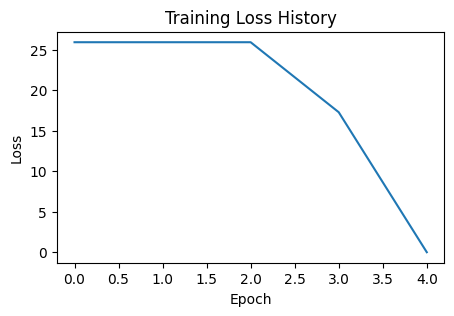

Predictions:
Input: (0, 0) Output: 0.0
Input: (0, 1) Output: 0.0
Input: (1, 0) Output: 0.0
Input: (1, 1) Output: 1.0


In [6]:
plot_training_history_and_predict(percp, hist)

#### Training with sigmoid activation

Epoch 10/100, Weights: [0.91 0.99], Bias: -1.82 Loss: 0.3938
Epoch 20/100, Weights: [1.7  1.73], Bias: -2.86 Loss: 0.2719
Epoch 30/100, Weights: [2.25 2.26], Bias: -3.63 Loss: 0.2107
Epoch 40/100, Weights: [2.67 2.68], Bias: -4.24 Loss: 0.1727
Epoch 50/100, Weights: [3.03 3.03], Bias: -4.76 Loss: 0.1463
Epoch 60/100, Weights: [3.33 3.33], Bias: -5.2 Loss: 0.1269
Epoch 70/100, Weights: [3.59 3.59], Bias: -5.59 Loss: 0.1119
Epoch 80/100, Weights: [3.83 3.83], Bias: -5.94 Loss: 0.1
Converged at epoch 81 with weights: [3.85 3.85], bias: -5.98 and loss: 0.099.


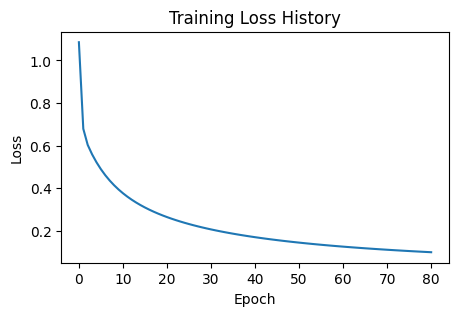

Predictions:
Input: (0, 0) Output: 0.0
Input: (0, 1) Output: 0.0
Input: (1, 0) Output: 0.0
Input: (1, 1) Output: 1.0


In [7]:
percp = Perceptron(2)
hist = percp.train(inputs, outputs, 0.5, 100, activation="sigmoid", epochs_difference_print=10)
plot_training_history_and_predict(percp, hist)

We can see that with step activation, the model converges much faster. This is probably because the problem is very simple, and just having the perceptron have values above 0 makes it 1 with the step activation.

The step function is a binary activation that outputs either 0 or 1 based on whether the input is positive or negative. This function is suitable for linearly separable problems like AND. With this setup, the perceptron converges quickly, reaching a loss close to zero before epoch 10. This rapid convergence reflects the simplicity of linear separation required for the AND gate, achieved with a low learning rate over a small number of epochs.

The sigmoid activation function provides continuous values between 0 and 1. This function is generally more effective for tasks that require a probabilistic interpretation or finer gradient adjustments, allowing the perceptron to slowly approximate the non-linear decision boundaries. The model takes longer to converge, gradually reducing the loss over epochs.

## OR logic case

In [8]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[0], [1], [1], [1]])

#### Training with step activation

Epoch 1/30, Weights: [0.17 0.15], Bias: 0.69 Loss: 8.6349
Epoch 2/30, Weights: [0.17 0.15], Bias: 0.59 Loss: 8.6349
Epoch 3/30, Weights: [0.17 0.15], Bias: 0.49 Loss: 8.6349
Epoch 4/30, Weights: [0.17 0.15], Bias: 0.39 Loss: 8.6349
Epoch 5/30, Weights: [0.17 0.15], Bias: 0.29 Loss: 8.6349
Epoch 6/30, Weights: [0.17 0.15], Bias: 0.19 Loss: 8.6349
Epoch 7/30, Weights: [0.17 0.15], Bias: 0.09 Loss: 8.6349
Epoch 8/30, Weights: [0.17 0.15], Bias: -0.01 Loss: 8.6349
Converged at epoch 9 with weights: [0.17 0.15], bias: -0.01 and loss: 0.0.


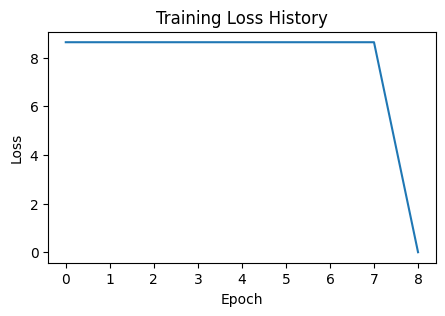

Predictions:
Input: (0, 0) Output: 0.0
Input: (0, 1) Output: 1.0
Input: (1, 0) Output: 1.0
Input: (1, 1) Output: 1.0


In [9]:
percp = Perceptron(2)
hist = percp.train(inputs, outputs, 0.1, 30, activation="step")
plot_training_history_and_predict(percp, hist)

#### Training with sigmoid activation

Epoch 10/100, Weights: [1.65 1.85], Bias: -0.06 Loss: 0.2708
Epoch 20/100, Weights: [2.51 2.62], Bias: -0.62 Loss: 0.1833
Epoch 30/100, Weights: [3.14 3.2 ], Bias: -0.99 Loss: 0.137
Epoch 40/100, Weights: [3.64 3.68], Bias: -1.27 Loss: 0.1087
Converged at epoch 45 with weights: [3.85 3.88], bias: -1.39 and loss: 0.0983.


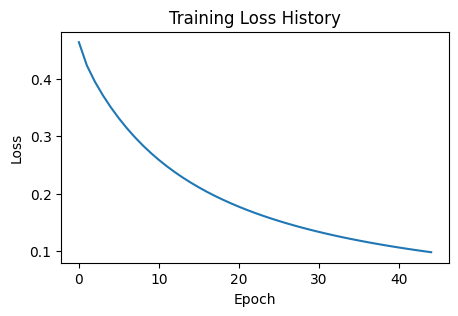

Predictions:
Input: (0, 0) Output: 0.0
Input: (0, 1) Output: 1.0
Input: (1, 0) Output: 1.0
Input: (1, 1) Output: 1.0


In [10]:
percp = Perceptron(2)
hist = percp.train(inputs, outputs, 0.5, 100, activation="sigmoid", epochs_difference_print=10)
plot_training_history_and_predict(percp, hist)

Here we fave similar results as the AND case.

## XOR logic case

In [11]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[1], [0], [0], [1]])

#### Training with step activation

Epoch 5/30, Weights: [ 0.04 -0.09], Bias: -0.08 Loss: 8.6349
Epoch 10/30, Weights: [0.14 0.01], Bias: 0.12 Loss: 17.2694
Epoch 15/30, Weights: [ 0.04 -0.09], Bias: -0.08 Loss: 17.2698
Epoch 20/30, Weights: [0.14 0.01], Bias: 0.12 Loss: 17.2694
Epoch 25/30, Weights: [ 0.04 -0.09], Bias: -0.08 Loss: 17.2698


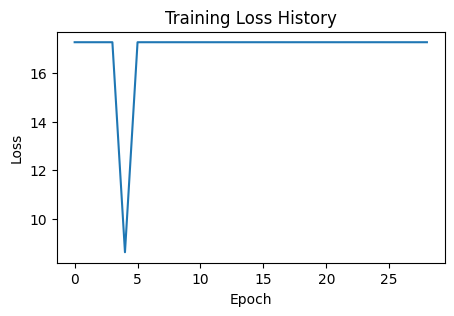

Predictions:
Input: (0, 0) Output: 0.0
Input: (0, 1) Output: 0.0
Input: (1, 0) Output: 0.0
Input: (1, 1) Output: 0.0


In [12]:
percp = Perceptron(2)
hist = percp.train(inputs, outputs, 0.1, 30, activation="step", epochs_difference_print=5)
plot_training_history_and_predict(percp, hist)

#### Training with sigmoid activation

Epoch 10/100, Weights: [-0.07 -0.04], Bias: 0.07 Loss: 0.6934
Epoch 20/100, Weights: [-0.03 -0.02], Bias: 0.03 Loss: 0.6932
Epoch 30/100, Weights: [-0.01 -0.01], Bias: 0.01 Loss: 0.6932
Epoch 40/100, Weights: [-0.01 -0.  ], Bias: 0.01 Loss: 0.6931
Epoch 50/100, Weights: [-0. -0.], Bias: 0.0 Loss: 0.6931
Epoch 60/100, Weights: [-0. -0.], Bias: 0.0 Loss: 0.6931
Epoch 70/100, Weights: [-0. -0.], Bias: 0.0 Loss: 0.6931
Epoch 80/100, Weights: [-0. -0.], Bias: 0.0 Loss: 0.6931
Epoch 90/100, Weights: [-0. -0.], Bias: 0.0 Loss: 0.6931


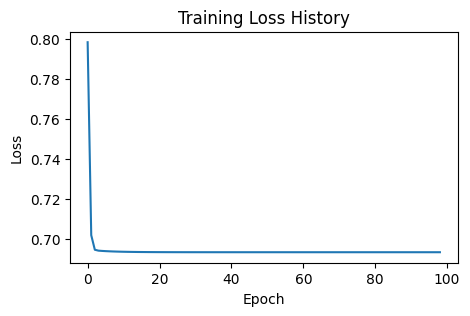

Predictions:
Input: (0, 0) Output: 1.0
Input: (0, 1) Output: 1.0
Input: (1, 0) Output: 1.0
Input: (1, 1) Output: 0.0


In [13]:
percp = Perceptron(2)
hist = percp.train(inputs, outputs, 0.5, 100, activation="sigmoid", epochs_difference_print=10)
plot_training_history_and_predict(percp, hist)

The perceptron clearly has problem to solve the XOR case, doesn't matter with we use step ou sigmoid activation, because we have classification problem witch is not linearly separable. The perceptron has limited function approximation capacity (cannot perform a simple logical function like XOR).

## Conclusions

A single perceptron can learn to solve the AND and OR gates but struggles with the XOR gate, as it requires a more advanced neural network architecture due to its non-linearly separable nature. One solution would be to implement a multi layer perceptron (MLP).